#  Python 데이터 시각화 실습 (Sales Data)

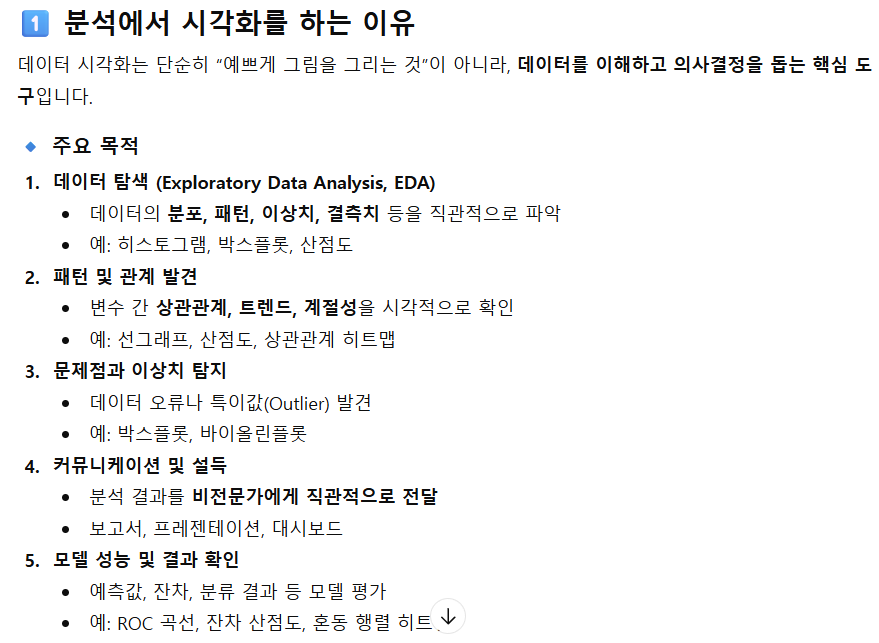

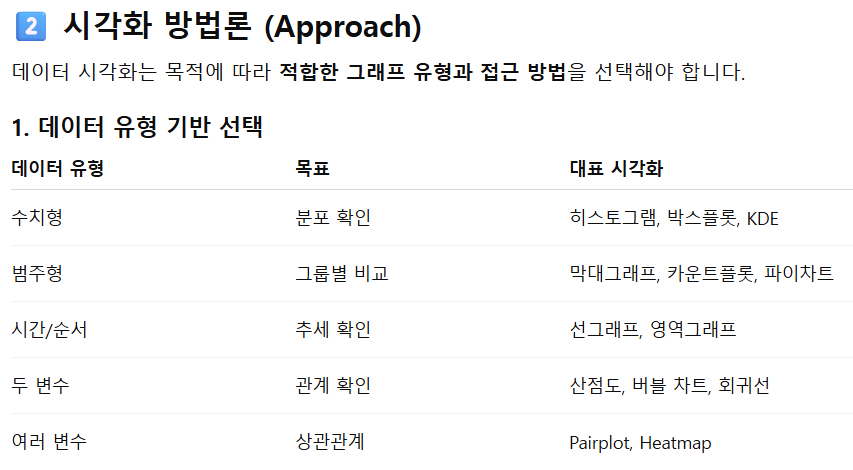

# 분석 접근법

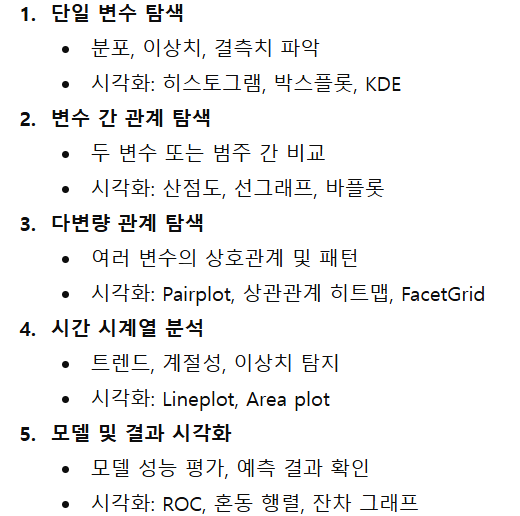

## 데이터 생성

In [22]:
import pandas as pd
import numpy as np

#  랜덤 시드 고정 (재현성 보장)
np.random.seed(42)

#  날짜 생성 (2024년 1월 1일 ~ 12월 31일)
dates = pd.date_range('2024-01-01', '2024-12-31')

#  지역과 제품 카테고리 정의
regions = ['서울', '부산', '대구', '광주', '인천']
products = ['A', 'B', 'C', 'D']

#  가상의 매출 데이터 생성
data = {
    'date': np.random.choice(dates, 1000),
    'region': np.random.choice(regions, 1000),
    'product': np.random.choice(products, 1000),
    'sales': np.random.randint(100, 1000, 1000),   # 매출 100~1000만원
    'profit': np.random.randint(10, 200, 1000)     # 이익 10~200만원
}

#  DataFrame 생성
df = pd.DataFrame(data)

#  날짜 기준 정렬
df = df.sort_values('date').reset_index(drop=True)

#  CSV 저장
df.to_csv('sales_data.csv', index=False, encoding='utf-8-sig')

print("'sales_data.csv' 파일이 생성되었습니다.")
print(df.head())


'sales_data.csv' 파일이 생성되었습니다.
        date region product  sales  profit
0 2024-01-01     광주       B    982     173
1 2024-01-01     광주       C    134     124
2 2024-01-01     부산       D    148     123
3 2024-01-01     광주       A    745      74
4 2024-01-01     서울       B    389     147


## 데이터 가져오기

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# CSV 불러오기
df = pd.read_csv('sales_data.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()


,date,region,product,sales,profit
0,2024-01-01,광주,B,982,173
1,2024-01-01,광주,C,134,124
2,2024-01-01,부산,D,148,123
3,2024-01-01,광주,A,745,74
4,2024-01-01,서울,B,389,147


In [24]:
type(df['date'])

pandas.core.series.Series

In [2]:
! pip install folium


   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]



## 총 매출액 분포 (단일 변수 분포 확인)

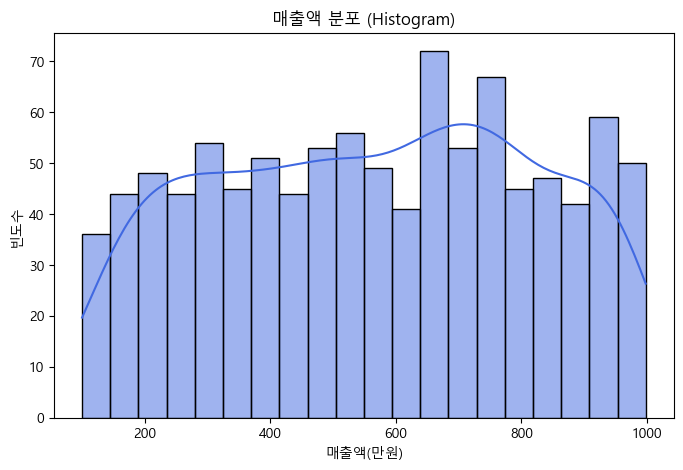

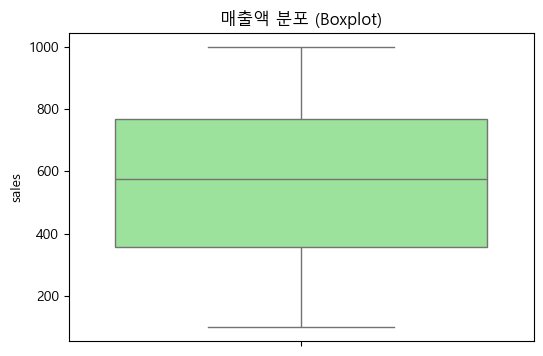

In [5]:
from matplotlib import font_manager, rc

# ① 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 지정
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 부호 깨짐 방지

plt.figure(figsize=(8,5))
sns.histplot(df['sales'], bins=20, kde=True, color='royalblue')
plt.title('매출액 분포 (Histogram)')
plt.xlabel('매출액(만원)')
plt.ylabel('빈도수')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y='sales', data=df, color='lightgreen')
plt.title('매출액 분포 (Boxplot)')
plt.show()

## 월별 총 매출 추세 (시간 순서)

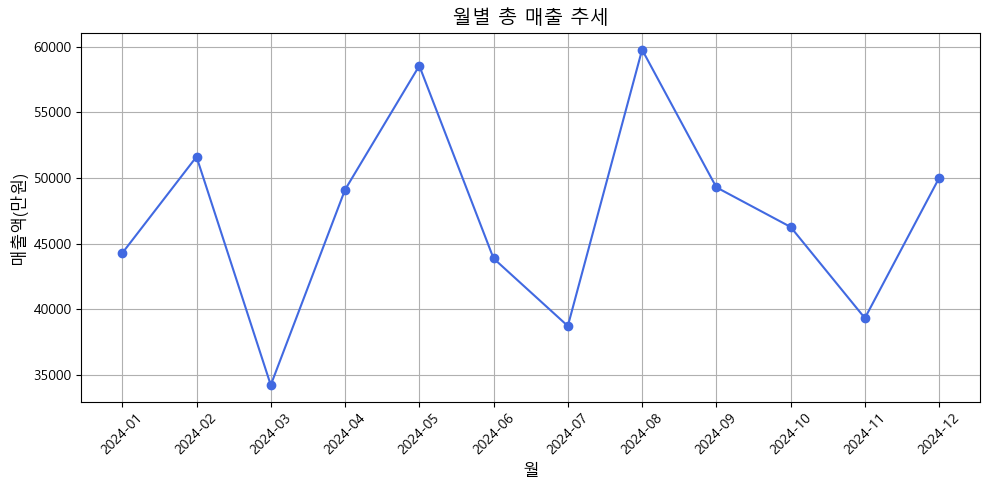

In [6]:
import matplotlib.pyplot as plt

# 'date' 컬럼을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

# 월 단위 매출 집계
df_month = df.groupby(df['date'].dt.to_period('M')).sum(numeric_only=True)
df_month.index = df_month.index.astype(str)

# 그래프 크기 및 스타일 설정
plt.figure(figsize=(10, 5))

# 선 그래프 생성
plt.plot(df_month.index, df_month['sales'], marker='o', color='royalblue')

# 그래프 제목, 축 이름, 격자 설정
plt.title('월별 총 매출 추세', fontsize=14)
plt.xlabel('월', fontsize=12)
plt.ylabel('매출액(만원)', fontsize=12)
plt.grid(True)

# X축 눈금 라벨 회전
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 지역별 평균 매출 비교(범주형 변수 비교) 

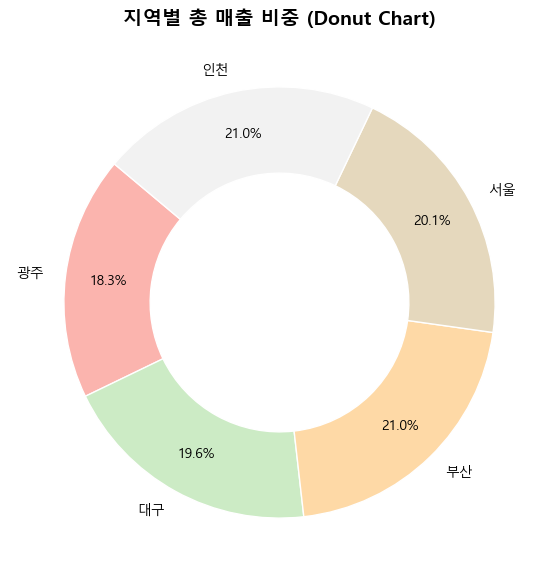

In [8]:
import numpy as np

region_sales = df.groupby('region')['sales'].sum()
colors = plt.cm.Pastel1(np.linspace(0, 1, len(region_sales)))

fig, ax = plt.subplots(figsize=(7,7))
wedges, texts, autotexts = ax.pie(
    region_sales,
    labels=region_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    pctdistance=0.8,  # 퍼센트 텍스트 위치
    wedgeprops=dict(width=0.4, edgecolor='w')  # 도넛 모양
)

ax.set_title('지역별 총 매출 비중 (Donut Chart)', fontsize=14, fontweight='bold')
plt.show()

## 제품별 매출-이익 상관관계 (두 변수 관계)

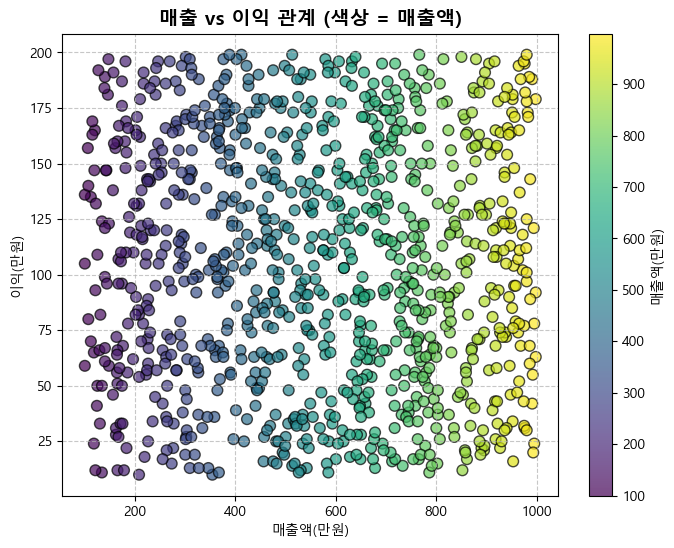

In [9]:

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['sales'], df['profit'],
                      c=df['sales'], cmap='viridis',
                      s=60, alpha=0.7, edgecolor='black')

plt.colorbar(scatter, label='매출액(만원)')
plt.title('매출 vs 이익 관계 (색상 = 매출액)', fontsize=14, fontweight='bold')
plt.xlabel('매출액(만원)')
plt.ylabel('이익(만원)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## 지역별 월간 매출 추세 (Plotly 대화형 그래프)

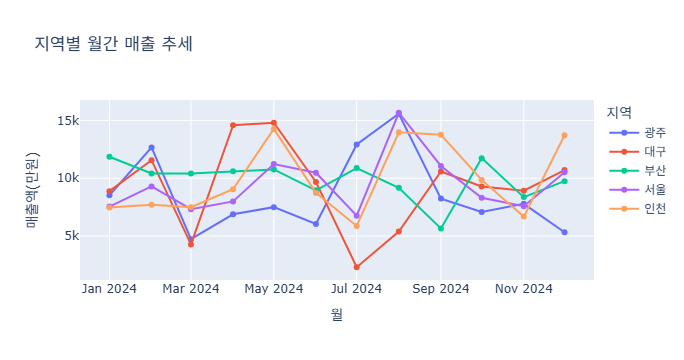

In [10]:
import plotly.express as px

# 🔹 월별 + 지역별 총 매출
df['month'] = df['date'].dt.strftime('%Y-%m')
df_month_region = df.groupby(['month', 'region'])['sales'].sum().reset_index()

# 🔹 Plotly 그래프
fig = px.line(
    df_month_region,
    x='month',
    y='sales',
    color='region',
    title='지역별 월간 매출 추세',
    markers=True
)

fig.update_layout(
    xaxis_title='월',
    yaxis_title='매출액(만원)',
    legend_title='지역'
)
fig.show()


## 지역별 평균 매출 지도 시각화 (Folium)

In [25]:
import folium

# 지역별 평균 매출
region_sales = df.groupby('region')['sales'].mean()

# 지역별 위도/경도 (예시 좌표)
region_coords = {
    '서울': [37.5665, 126.9780],
    '부산': [35.1796, 129.0756],
    '대구': [35.8714, 128.6014],
    '광주': [35.1595, 126.8526],
    '인천': [37.4563, 126.7052]
}

# 지도 생성
m = folium.Map(location=[36.5, 127.8], zoom_start=7)

# 각 지역에 CircleMarker 추가
for region, avg_sales in region_sales.items():
    folium.CircleMarker(
        location=region_coords[region],
        radius=avg_sales / 50,  # 매출 크기에 비례한 원 크기
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"{region}: {avg_sales:.1f}만원"
    ).add_to(m)

# 지도 저장 및 표시
m.save('sales_map.html')
m


## Seaborn

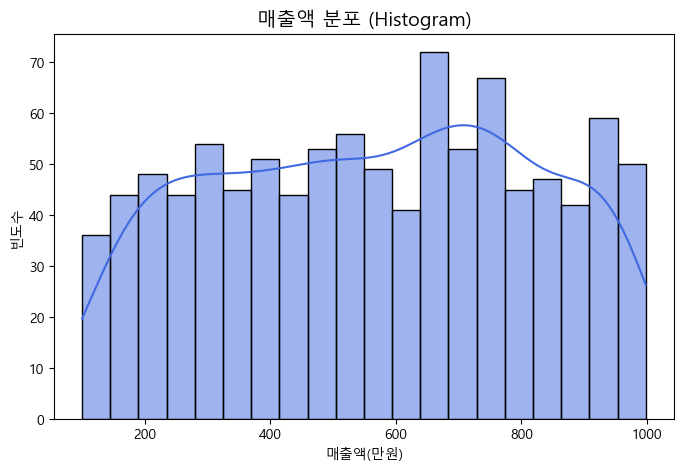

In [12]:
# ------------------------------------------------------------
# 🔹 매출액(sales) 분포 히스토그램  → 단일 변수의 분포(빈도)를 시각적으로 파악
# ------------------------------------------------------------

plt.figure(figsize=(8,5))
sns.histplot(df['sales'], bins=20, kde=True, color='royalblue')

plt.title('매출액 분포 (Histogram)', fontsize=14)
plt.xlabel('매출액(만원)')
plt.ylabel('빈도수')
plt.show()

# ✅ 해석:
# - KDE(커널 밀도 추정) 선은 분포의 형태를 부드럽게 표현합니다.
# - 한쪽으로 치우쳤는지(왜도), 중앙값 근처 분포 폭 등을 쉽게 확인할 수 있습니다.


C:\Users\human\AppData\Local\Temp\ipykernel_15132\654749013.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




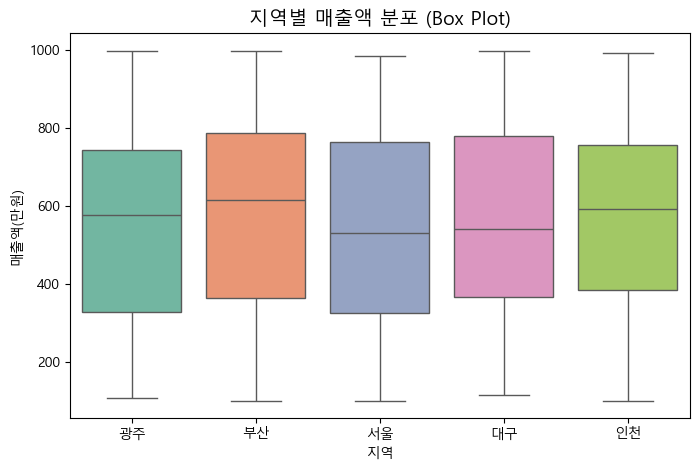

In [13]:
# ------------------------------------------------------------
# 🔹 지역별 매출액 박스플롯  → 이상치(outlier) 탐지 및 분포 비교
# ------------------------------------------------------------

plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='sales', data=df, palette='Set2')

plt.title('지역별 매출액 분포 (Box Plot)', fontsize=14)
plt.xlabel('지역')
plt.ylabel('매출액(만원)')
plt.show()

# ✅ 해석:
# - 각 박스는 데이터의 1사분위~3사분위 범위를 나타냄.
# - 가운데 선은 중앙값(Median).
# - 점(●)은 이상치(Outlier)로, 평균과 다른 데이터 포인트입니다.


C:\Users\human\AppData\Local\Temp\ipykernel_15132\2905205344.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\human\AppData\Local\Temp\ipykernel_15132\2905205344.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




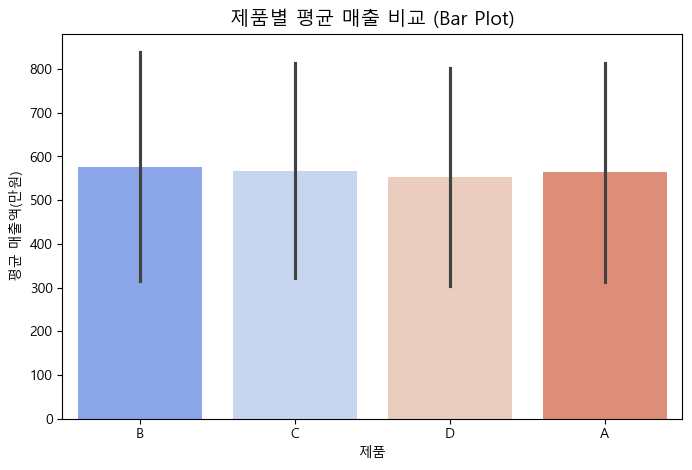

In [14]:
# ------------------------------------------------------------
# 🔹 제품별 평균 매출 비교  → 범주형 데이터의 평균/합계 비교
# ------------------------------------------------------------

import numpy as np  # numpy 불러오기

plt.figure(figsize=(8,5))
sns.barplot(x='product', y='sales', data=df, estimator=np.mean, ci='sd', palette='coolwarm')

plt.title('제품별 평균 매출 비교 (Bar Plot)', fontsize=14)
plt.xlabel('제품')
plt.ylabel('평균 매출액(만원)')
plt.show()


# ✅ 해석:
# - 각 막대는 평균 매출, 검은색 선은 표준편차(SD)입니다.
# - 특정 제품군(A~D) 중 어느 제품의 매출이 높은지 직관적으로 비교할 수 있습니다.


C:\Users\human\AppData\Local\Temp\ipykernel_15132\1072212292.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




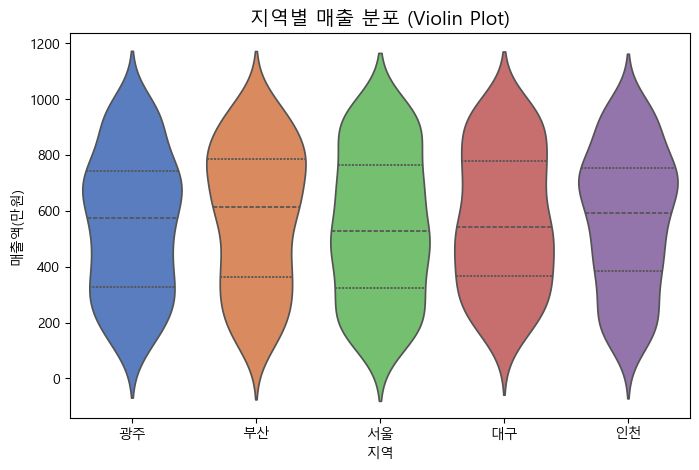

In [15]:
# ------------------------------------------------------------
# 🔹 지역별 매출 분포 바이올린플롯  → 박스플롯 + 분포 모양(KDE)을 동시에 표현
# ------------------------------------------------------------

plt.figure(figsize=(8,5))
sns.violinplot(x='region', y='sales', data=df, inner='quartile', palette='muted')

plt.title('지역별 매출 분포 (Violin Plot)', fontsize=14)
plt.xlabel('지역')
plt.ylabel('매출액(만원)')
plt.show()

# ✅ 해석:
# - 박스플롯과 유사하지만, 데이터가 많이 몰린 구간은 두껍게 표시됨.
# - 분포가 비대칭인지, 여러 봉우리가 있는지 등을 시각적으로 확인 가능.


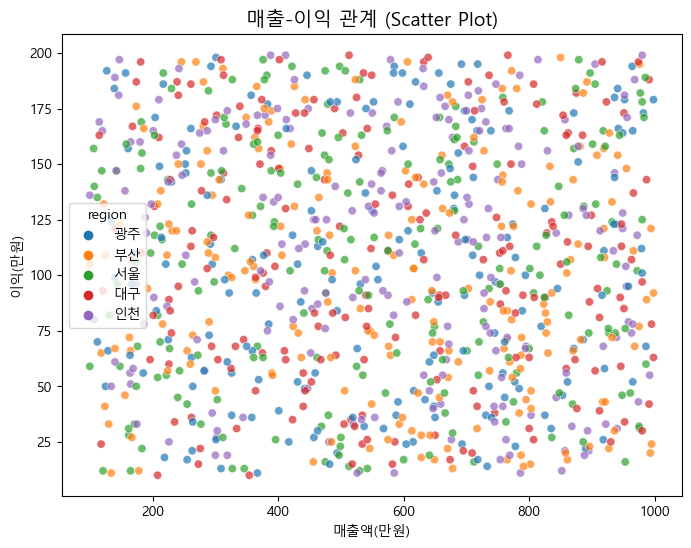

In [35]:
# ------------------------------------------------------------
# 🔹 매출액(sales)과 이익(profit)의 상관관계   → 두 연속형 변수 간의 관계 시각화
# ------------------------------------------------------------

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sales', y='profit', hue='region', alpha=0.7)

plt.title('매출-이익 관계 (Scatter Plot)', fontsize=14)
plt.xlabel('매출액(만원)')
plt.ylabel('이익(만원)')
plt.show()

# ✅ 해석:
# - 점의 색깔은 지역(region)을 나타냄.
# - 오른쪽 위로 갈수록 매출과 이익이 모두 높은 패턴 확인 가능.
# - 양의 상관관계를 시각적으로 식별.


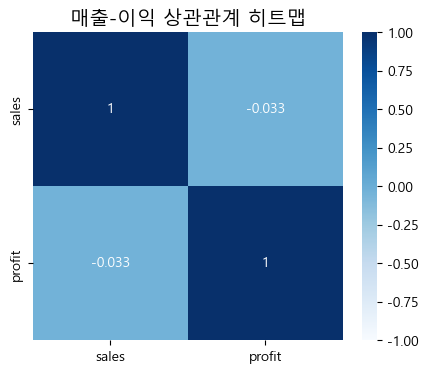

In [16]:
# ------------------------------------------------------------
# 🔹 매출과 이익의 상관관계 히트맵   → 여러 변수 간의 상관계수(Correlation)를 색상으로 표현
# ------------------------------------------------------------

plt.figure(figsize=(5,4))
corr = df[['sales', 'profit']].corr()  # 상관계수 계산

sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)

plt.title('매출-이익 상관관계 히트맵', fontsize=14)
plt.show()

# ✅ 해석:
# - +1에 가까울수록 강한 양의 상관관계 (같이 증가)
# - -1에 가까울수록 강한 음의 상관관계 (반대로 움직임)


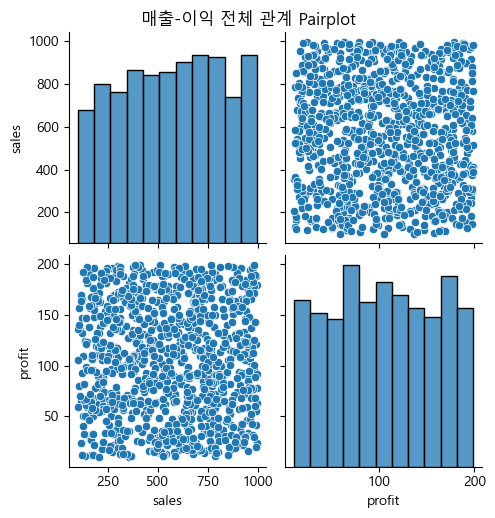

In [17]:
# ------------------------------------------------------------
# 🔹 수치형 변수 간 전체 관계 탐색  → 여러 변수의 조합 관계를 한 번에 확인 (EDA에서 매우 유용)
# ------------------------------------------------------------

sns.pairplot(df[['sales', 'profit']], kind='scatter')
plt.suptitle('매출-이익 전체 관계 Pairplot', y=1.02)
plt.show()

# ✅ 해석:
# - 각 조합별 산점도를 자동으로 그려줍니다.
# - 데이터 간 상관 경향 및 분포를 빠르게 확인 가능.


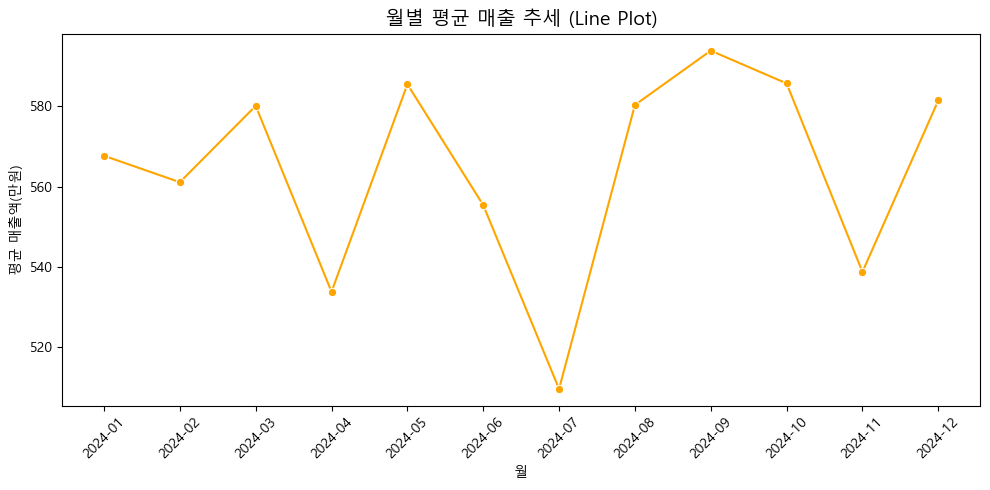

In [18]:
# ------------------------------------------------------------
# 🔹 월별 평균 매출 추세  → 시간(date)에 따른 변화 추세를 시각화
# ------------------------------------------------------------

# 월 단위 집계
df['month'] = df['date'].dt.to_period('M').astype(str)
month_sales = df.groupby('month')['sales'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='sales', data=month_sales, marker='o', color='orange')

plt.title('월별 평균 매출 추세 (Line Plot)', fontsize=14)
plt.xlabel('월')
plt.ylabel('평균 매출액(만원)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ 해석:
# - 시계열 데이터를 통해 시즌성이나 증가 추세를 파악할 수 있습니다.


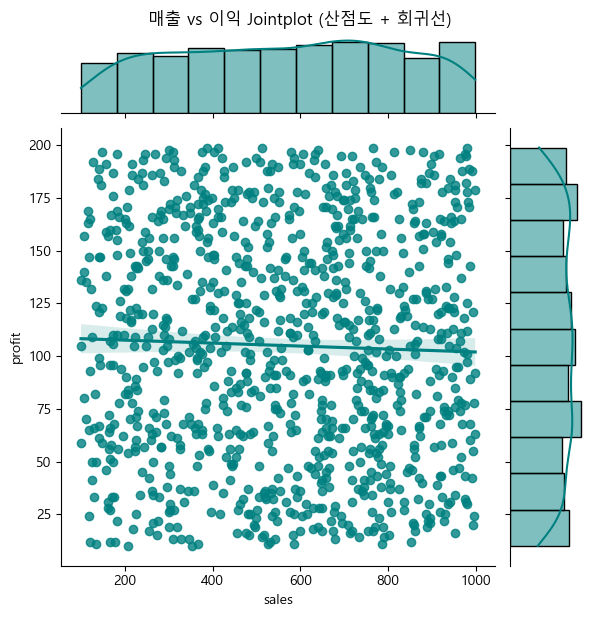

In [19]:
# ------------------------------------------------------------
# 🔹 매출 vs 이익 관계 + 분포를 동시에 시각화  → 산점도 + 히스토그램을 한 화면에 표시
# ------------------------------------------------------------

sns.jointplot(x='sales', y='profit', data=df, kind='reg', color='teal')

plt.suptitle('매출 vs 이익 Jointplot (산점도 + 회귀선)', y=1.02)
plt.show()

# ✅ 해석:
# - 중심 그래프: 매출과 이익의 산점도 및 회귀선
# - 양쪽 축: 각 변수의 히스토그램
# - 선형 관계를 시각적으로 파악 가능.
